TODO: Overview of what we are doing

---

First we read our data from our csv file and set the `subject`, `sessionIndex`,
and `rep` columns as our index columns to facilitate our access of the data we
want (see documentation for
[pandas.DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
). `pd.read_csv` sets the type of the subject column as `object`, so we
explicitly declare it as `string`.


In [36]:
import gudhi as gd
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'serif'

strong_password_data_frame = pd.read_csv('data/DSL-StrongPasswordData.csv',
                                   # declare type of 'subject' column
                                   dtype = {'subject' : 'string'},
                                   index_col = ['subject', 'sessionIndex', 'rep'])
strong_password_data_frame

H.period  DD.period.t  UD.period.t     H.t  DD.t.i  \
subject sessionIndex rep                                                       
s002    1            1      0.1491       0.3979       0.2488  0.1069  0.1674   
                     2      0.1111       0.3451       0.2340  0.0694  0.1283   
                     3      0.1328       0.2072       0.0744  0.0731  0.1291   
                     4      0.1291       0.2515       0.1224  0.1059  0.2495   
                     5      0.1249       0.2317       0.1068  0.0895  0.1676   
...                            ...          ...          ...     ...     ...   
s057    8            46     0.0884       0.0685      -0.0199  0.1095  0.1290   
                     47     0.0655       0.0630      -0.0025  0.0910  0.1148   
                     48     0.0939       0.1189       0.0250  0.1008  0.1122   
                     49     0.0923       0.1294       0.0371  0.0913  0.0990   
                     50     0.0596       0.1310       0.0714  0.0992  0.1103   

                          UD.t.i     H.i  DD.i.e  UD.i.e     H.e  ...     H.a  \
subject sessionIndex rep                                          ...           
s002    1            1    0.0605  0.1169  0.2212  0.1043  0.1417  ...  0.1349   
                     2    0.0589  0.0908  0.1357  0.0449  0.0829  ...  0.1412   
                     3    0.0560  0.0821  0.1542  0.0721  0.0808  ...  0.1621   
                     4    0.1436  0.1040  0.2038  0.0998  0.0900  ...  0.1457   
                     5    0.0781  0.0903  0.1589  0.0686  0.0805  ...  0.1312   
...                          ...     ...     ...     ...     ...  ...     ...   
s057    8            46   0.0195  0.0945  0.0757 -0.0188  0.1328  ...  0.1219   
                     47   0.0238  0.0916  0.0636 -0.0280  0.1256  ...  0.1008   
                     48   0.0114  0.0721  0.0462 -0.0259  0.0903  ...  0.0913   
                     49   0.0077  0.0992  0.0897 -0.0095  0.1016  ...  0.0882   
                     50   0.0111  0.0998  0.0813 -0.0185  0.1493  ...  0.0969   

                          DD.a.n  UD.a.n     H.n  DD.n.l  UD.n.l     H.l  \
subject sessionIndex rep                                                   
s002    1            1    0.1484  0.0135  0.0932  0.3515  0.2583  0.1338   
                     2    0.2558  0.1146  0.1146  0.2642  0.1496  0.0839   
                     3    0.2332  0.0711  0.1172  0.2705  0.1533  0.1085   
                     4    0.1629  0.0172  0.0866  0.2341  0.1475  0.0845   
                     5    0.1582  0.0270  0.0884  0.2517  0.1633  0.0903   
...                          ...     ...     ...     ...     ...     ...   
s057    8            46   0.1383  0.0164  0.0820  0.1329  0.0509  0.1005   
                     47   0.0512 -0.0496  0.1037  0.0868 -0.0169  0.1445   
                     48   0.1169  0.0256  0.0689  0.1311  0.0622  0.1034   
                     49   0.0821 -0.0061  0.0576  0.0697  0.0121  0.0979   
                     50   0.0784 -0.0185  0.0790  0.1133  0.0343  0.0807   

                          DD.l.Return  UD.l.Return  H.Return  
subject sessionIndex rep                                      
s002    1            1         0.3509       0.2171    0.0742  
                     2         0.2756       0.1917    0.0747  
                     3         0.2847       0.1762    0.0945  
                     4         0.3232       0.2387    0.0813  
                     5         0.2517       0.1614    0.0818  
...                               ...          ...       ...  
s057    8            46        0.2054       0.1049    0.1047  
                     47        0.2206       0.0761    0.1198  
                     48        0.2017       0.0983    0.0905  
                     49        0.1917       0.0938    0.0931  
                     50        0.1993       0.1186    0.1018  

[20400 rows x 31 columns]

We put a sample of the subjects and their password typing data in a `people`
array (each index contains a DataFrame). The subjects `s006`, `s009`, `s014`,
`s023`, and `s045` are missing; so we create and use the helper function
`subjects_in_range` to generate the labels.

In [44]:
def subjects_in_range(start, stop):
    """Returns a list of labels for subjects in the subject column.

    :param start: integer between 2 and 57, inclusive
    :param stop: integer between 2 and 57, inclusive. Should be greater than or
                 equal to start.
    :returns: list of zero-padded subject labels beginning with s{start} to s{stop}
    """
    return [f's{i:03}' for i in range(start, 1 + stop) if i not in [6, 9, 14, 23, 45]]

people = [strong_password_data_frame.loc[subject] for subject in subjects_in_range(2,6)]
names_of_people = ['Felix', 'Emmy', 'Vanessa', 'Saunders']

We probably don't want the index columns when creating our simplicial
complexes, so we use `to_numpy` on our `DataFrame`s to strip them out.

In [3]:
people[0].to_numpy()

array([[0.1491, 0.3979, 0.2488, ..., 0.3509, 0.2171, 0.0742],
       [0.1111, 0.3451, 0.234 , ..., 0.2756, 0.1917, 0.0747],
       [0.1328, 0.2072, 0.0744, ..., 0.2847, 0.1762, 0.0945],
       ...,
       [0.1642, 0.175 , 0.0108, ..., 0.3048, 0.1997, 0.1259],
       [0.1623, 0.2126, 0.0503, ..., 0.314 , 0.1601, 0.1154],
       [0.1792, 0.1889, 0.0097, ..., 0.5261, 0.3862, 0.108 ]])

In [4]:
simplex_trees = []
persistence_diagrams = []

for person in people:
    simplicial_complex = gd.RipsComplex(points = person.to_numpy(),
                                        max_edge_length = 0.2)
    simplex_tree = simplicial_complex.create_simplex_tree(max_dimension = 4)
    simplex_trees.append(simplex_tree)
    persistence_diagrams.append(simplex_tree.persistence())

Now we plot the persistence diagrams:

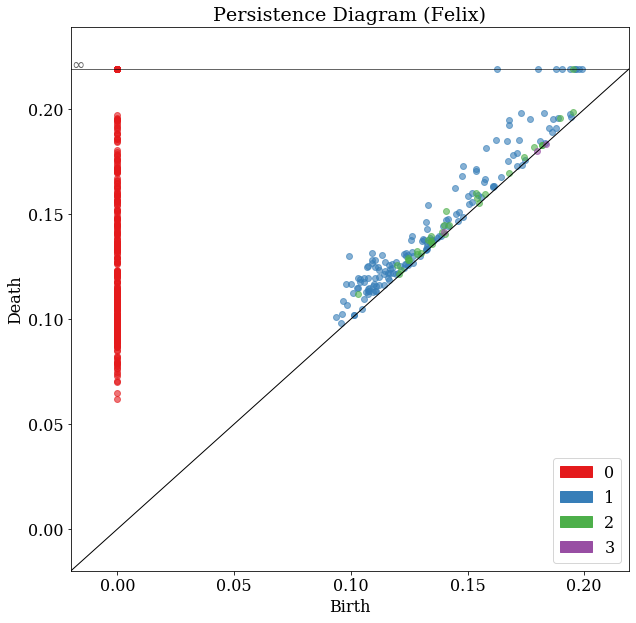

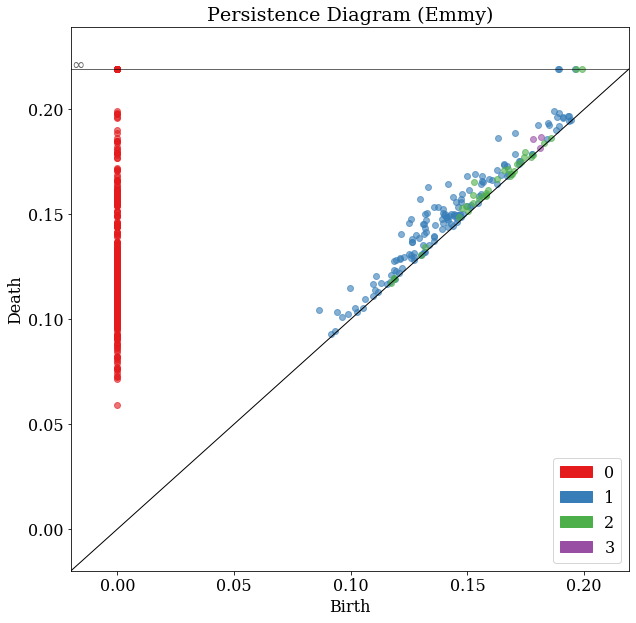

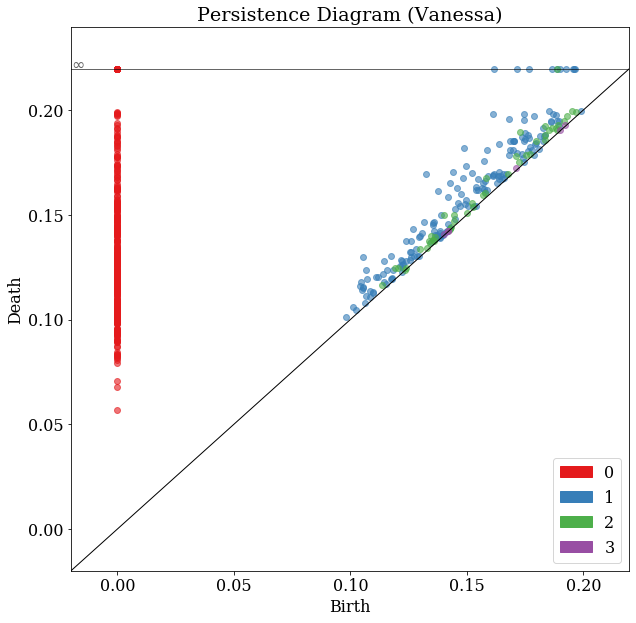

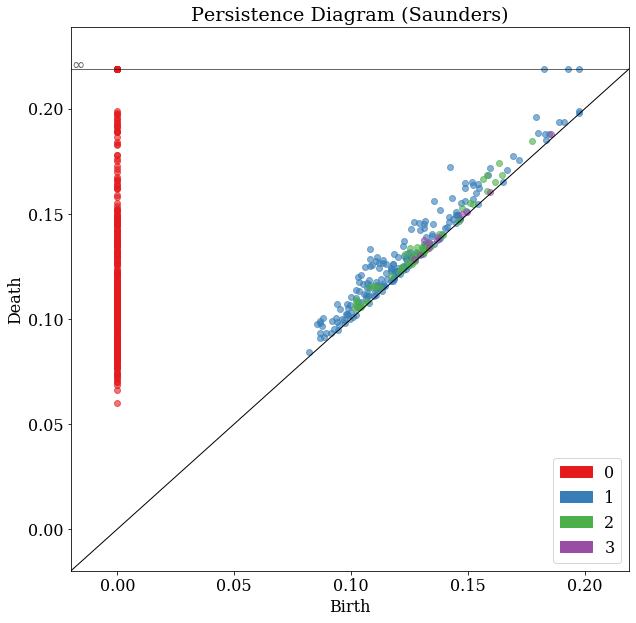

In [45]:
for diagram, name in zip(persistence_diagrams, names_of_people):
    plot = gd.plot_persistence_diagram(diagram, legend=True)
    plot.set_title(f'Persistence Diagram ({name})')

... and the barcode diagrams:

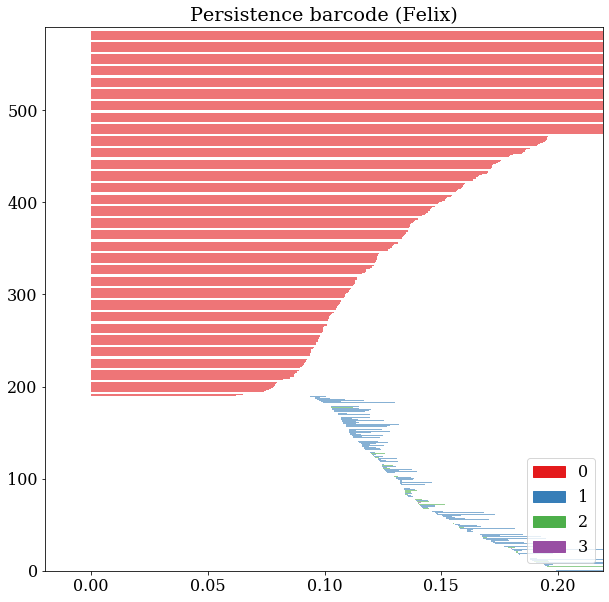

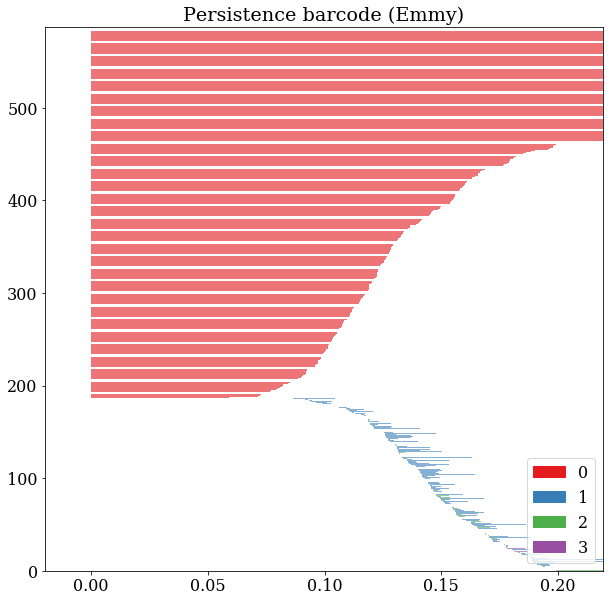

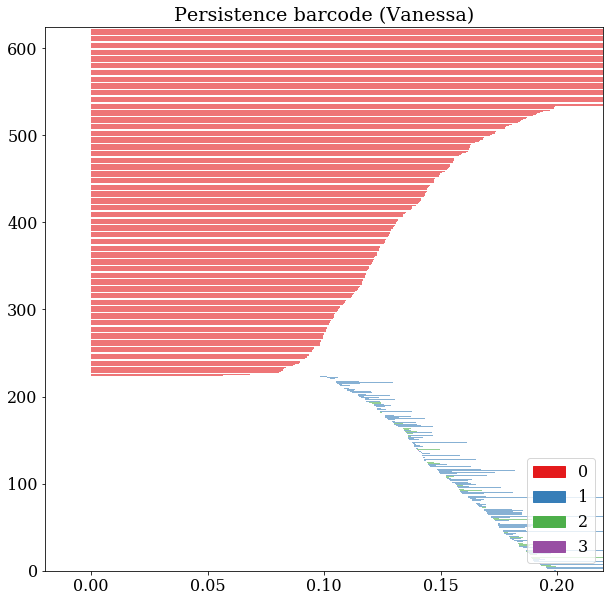

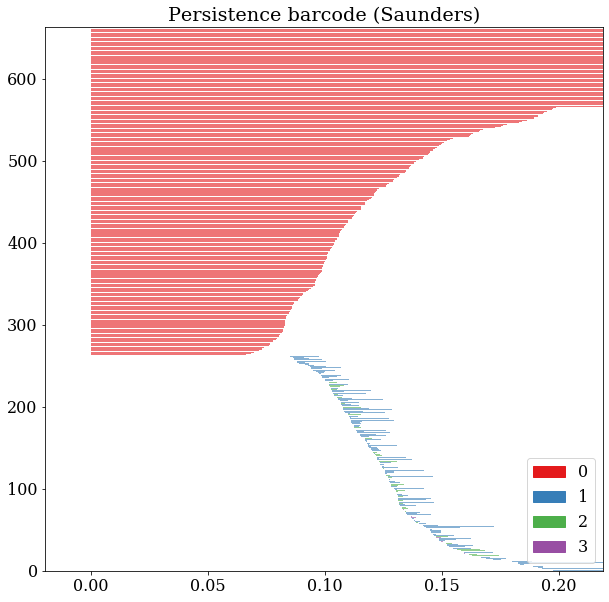

In [46]:
for diagram, name in zip(persistence_diagrams, names_of_people):
    plot = gd.plot_persistence_barcode(diagram, legend=True)
    plot.set_title(f'Persistence barcode ({name})')

Now we compute some bottleneck distances:

In [7]:
pers_intervals_array_in_dim = []

for i in range(4):
    pers_intervals_array_in_dim.append(
        [simplex_tree.persistence_intervals_in_dimension(i)
         for simplex_tree in simplex_trees])

In [8]:
for dimension in range(len(pers_intervals_array_in_dim)):
    print(f'i j\t bottleneck distance ({dimension}D)')
    print('---\t -------------------')
    for i in range(len(pers_intervals_array_in_dim)):
        for j in range(i, len(pers_intervals_array_in_dim)):
            a = pers_intervals_array_in_dim[dimension][i]
            b = pers_intervals_array_in_dim[dimension][j]
            print(f'{i} {j}\t {gd.bottleneck_distance(a, b)}')
    print('\n')

i j	 bottleneck distance (0D)
---	 -------------------
0 0	 2.139773181616766e-308
0 1	 inf
0 2	 inf
0 3	 inf
1 1	 1.7983103373142034e-308
1 2	 inf
1 3	 inf
2 2	 6.835591634431975e-309
2 3	 inf
3 3	 6.490005218848194e-309


i j	 bottleneck distance (1D)
---	 -------------------
0 0	 2.005107998183667e-308
0 1	 inf
0 2	 inf
0 3	 inf
1 1	 2.0169991576077073e-308
1 2	 inf
1 3	 0.010387122461315415
2 2	 1.624131700513677e-308
2 3	 inf
3 3	 1.6434267740317243e-308


i j	 bottleneck distance (2D)
---	 -------------------
0 0	 1.3794267357217946e-308
0 1	 inf
0 2	 0.007583584371637142
0 3	 inf
1 1	 1.5652746802219295e-308
1 2	 inf
1 3	 inf
2 2	 1.522924225221412e-308
2 3	 inf
3 3	 2.113406741610404e-308


i j	 bottleneck distance (3D)
---	 -------------------
0 0	 1.641423566317772e-308
0 1	 0.003782886280188774
0 2	 0.0006711645775555053
0 3	 0.0031640030333373037
1 1	 1.671892473329967e-308
1 2	 0.003782886280188774
1 3	 0.003782886280188774
2 2	 1.911631244059211e-308
2 3	 0.00316400303333